# Exercise 6.6 Sourcing & Analyzing Time Series Data

This script contains:

1. Importing libraries
2. Subsetting, wrangling, cleaning time series data
3. Time series analysis - decomposition
4. Testing for stationarity
5. Stationarizing the WB data

# 01. Importing libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore") # Disable deprecation warnings

plt.style.use('fivethirtyeight')

In [2]:
# import World Bank data using the WBGAPI

import wbgapi as wb

In [3]:
# look for any indicators with 'greenhouse'

wb.search('greenhouse')

ID,Name,Field,Value
AG.CON.FERT.PT.ZS,,Developmentrelevance,"...aphids. Further, excessive use of fertilizers emits significant quantities of greenhouse gas into the atmosphere. Over-fertilization of a vital nutrient can be..."
AG.CON.FERT.ZS,,Developmentrelevance,"...aphids. Further, excessive use of fertilizers emits significant quantities of greenhouse gas into the atmosphere. Over-fertilization of a vital nutrient can be..."
AG.LND.EL5M.RU.ZS,,Developmentrelevance,"...have changed the chemical composition of the atmosphere through a buildup of greenhouse gases - primarily carbon dioxide, methane, and nitrous oxide. Rising global..."
AG.LND.EL5M.UR.K2,,Developmentrelevance,"...have changed the chemical composition of the atmosphere through a buildup of greenhouse gases - primarily carbon dioxide, methane, and nitrous oxide. Rising global..."
AG.LND.EL5M.UR.ZS,,Developmentrelevance,"...have changed the chemical composition of the atmosphere through a buildup of greenhouse gases - primarily carbon dioxide, methane, and nitrous oxide. Rising global..."
AG.LND.EL5M.ZS,,Developmentrelevance,"...have changed the chemical composition of the atmosphere through a buildup of greenhouse gases - primarily carbon dioxide, methane, and nitrous oxide. Rising global..."
EG.ELC.LOSS.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.IMP.CONS.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.COMM.CL.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....
EG.USE.CRNW.ZS,,Developmentrelevance,...economic and readily available means of improving energy security and reducing greenhouse gas emissions....


In [4]:
wb.search('climate')

ID,Name,Field,Value
AG.AGR.TRAC.NO,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.CON.FERT.PT.ZS,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.CON.FERT.ZS,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.LND.AGRI.K2,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.LND.AGRI.ZS,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.LND.ARBL.HA,,Developmentrelevance,"...are intrinsically linked to global challenges of food insecurity and poverty, climate change adaptation and mitigation, as well as degradation and depletion of..."
AG.LND.ARBL.HA.PC,,Developmentrelevance,"...are intrinsically linked to global challenges of food insecurity and poverty, climate change adaptation and mitigation, as well as degradation and depletion of..."
AG.LND.ARBL.ZS,,Developmentrelevance,"...are intrinsically linked to global challenges of food insecurity and poverty, climate change adaptation and mitigation, as well as degradation and depletion of..."
AG.LND.CREL.HA,,Developmentrelevance,"...correct mix of inputs to the agricultural land, as it is dependent on local climate, land quality, and economic development; appropriate levels and application..."
AG.LND.CROP.ZS,,Developmentrelevance,"...are intrinsically linked to global challenges of food insecurity and poverty, climate change adaptation and mitigation, as well as degradation and depletion of..."


In [5]:
# Check titles of datasets

wb.source.info()

id,name,code,concepts,lastupdated
1,Doing Business,DBS,3,2021-08-18
2,World Development Indicators,WDI,3,2023-10-26
3,Worldwide Governance Indicators,WGI,3,2023-09-29
5,Subnational Malnutrition Database,SNM,3,2016-03-21
6,International Debt Statistics,IDS,4,2022-12-06
11,Africa Development Indicators,ADI,3,2013-02-22
12,Education Statistics,EDS,3,2023-10-12
13,Enterprise Surveys,ESY,3,2022-03-25
14,Gender Statistics,GDS,3,2023-10-30
15,Global Economic Monitor,GEM,3,2023-11-17


In [6]:
# check output for indicators

wb.series.info()

id,value
AG.AGR.TRAC.NO,"Agricultural machinery, tractors"
AG.CON.FERT.PT.ZS,Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS,Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2,Agricultural land (sq. km)
AG.LND.AGRI.ZS,Agricultural land (% of land area)
AG.LND.ARBL.HA,Arable land (hectares)
AG.LND.ARBL.HA.PC,Arable land (hectares per person)
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.CREL.HA,Land under cereal production (hectares)
AG.LND.CROP.ZS,Permanent cropland (% of land area)


In [7]:
# pull indicator - Total greenhouse gas emissions (kt of CO2 equivalent)

df_wb = wb.data.DataFrame(['EN.ATM.GHGT.KT.CE'])

In [8]:
df_wb.head()

,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
economy,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.331479e+06,1.358902e+06,1.356434e+06,1.370883e+06,1.386782e+06,1.399771e+06,1.430851e+06,1.389908e+06,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.043030e+04,3.116582e+04,3.161907e+04,3.086498e+04,3.175055e+04,3.258049e+04,3.273677e+04,3.111905e+04,NaN,NaN
AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.382876e+05,7.589952e+05,7.688846e+05,7.991418e+05,8.082265e+05,8.341287e+05,8.622246e+05,8.686874e+05,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.232591e+04,8.362814e+04,8.867304e+04,8.672687e+04,8.202371e+04,7.484815e+04,7.867238e+04,7.078106e+04,NaN,NaN


In [9]:
# reset index

df_wb = df_wb.reset_index()

In [10]:
df_wb.head()

,economy,YR1960,YR1961,YR1962,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,...,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.331479e+06,1.358902e+06,1.356434e+06,1.370883e+06,1.386782e+06,1.399771e+06,1.430851e+06,1.389908e+06,NaN,NaN
2,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.043030e+04,3.116582e+04,3.161907e+04,3.086498e+04,3.175055e+04,3.258049e+04,3.273677e+04,3.111905e+04,NaN,NaN
3,AFW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.382876e+05,7.589952e+05,7.688846e+05,7.991418e+05,8.082265e+05,8.341287e+05,8.622246e+05,8.686874e+05,NaN,NaN
4,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.232591e+04,8.362814e+04,8.867304e+04,8.672687e+04,8.202371e+04,7.484815e+04,7.867238e+04,7.078106e+04,NaN,NaN


In [11]:
# check data types

df_wb.dtypes

economy     object
YR1960     float64
YR1961     float64
YR1962     float64
YR1963     float64
            ...   
YR2018     float64
YR2019     float64
YR2020     float64
YR2021     float64
YR2022     float64
Length: 64, dtype: object

In [12]:
# transpose so that the dates are the index, and the column names are the countries

df_wb.T

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
YR1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YR2018,NaN,1399770.836953,32580.49106,834128.685418,74848.14556,9671.388481,617.413952,2756539.763102,234348.9903,378187.3624,...,NaN,399800.796,681.113593,48069812.64,598.977619,NaN,25020.13788,548100.8783,35737.70702,29374.28664
YR2019,NaN,1430850.662142,32736.76917,862224.588584,78672.38408,9196.36286,605.715596,2796418.0348,248670.7959,374523.504,...,NaN,454889.6818,642.597571,48089616.91,580.183607,NaN,25926.56546,555409.2845,36609.65068,28697.16047
YR2020,NaN,1389908.120222,31119.04539,868687.389867,70781.0562,8304.29494,577.573639,2682355.871188,249927.7494,361433.0173,...,NaN,470578.1002,588.659649,46120921.47,538.887695,NaN,24391.15073,501520.8805,36107.82044,25988.12599
YR2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# rename to transposed dataframe

df_ghg = df_wb.T

In [14]:
# check output
# need to rename the columns

df_ghg.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
YR1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_ghg.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,256,257,258,259,260,261,262,263,264,265
0,economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
1,YR1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,YR1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,YR1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,YR1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,YR2018,NaN,1399770.836953,32580.49106,834128.685418,74848.14556,9671.388481,617.413952,2756539.763102,234348.9903,...,NaN,399800.796,681.113593,48069812.64,598.977619,NaN,25020.13788,548100.8783,35737.70702,29374.28664
60,YR2019,NaN,1430850.662142,32736.76917,862224.588584,78672.38408,9196.36286,605.715596,2796418.0348,248670.7959,...,NaN,454889.6818,642.597571,48089616.91,580.183607,NaN,25926.56546,555409.2845,36609.65068,28697.16047
61,YR2020,NaN,1389908.120222,31119.04539,868687.389867,70781.0562,8304.29494,577.573639,2682355.871188,249927.7494,...,NaN,470578.1002,588.659649,46120921.47,538.887695,NaN,24391.15073,501520.8805,36107.82044,25988.12599
62,YR2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# create a new header using the first row

new_header = df_ghg.iloc[0]

In [17]:
# create new dataset using all data starting with row 1

df_ghg_new = df_ghg[1:]

In [18]:
df_ghg_new.head()

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
YR1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# assign new header for columns

df_ghg_new.columns = new_header

In [20]:
# check output
# now the year is the index and the columns are named by country

df_ghg_new.head()

economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
YR1960,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YR1964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_ghg_new.dtypes

economy
ABW    object
AFE    object
AFG    object
AFW    object
AGO    object
        ...  
XKX    object
YEM    object
ZAF    object
ZMB    object
ZWE    object
Length: 266, dtype: object

In [22]:
# create a new df with just world greenhouse gas emissions by Year

df_ghg_wld = df_ghg_new[['WLD']]

In [23]:
df_ghg_wld.tail(10)

economy,WLD
YR2013,45922199.7
YR2014,46235969.43
YR2015,46135596.34
YR2016,46288080.19
YR2017,47035210.47
YR2018,48069812.64
YR2019,48089616.91
YR2020,46120921.47
YR2021,NaN
YR2022,NaN


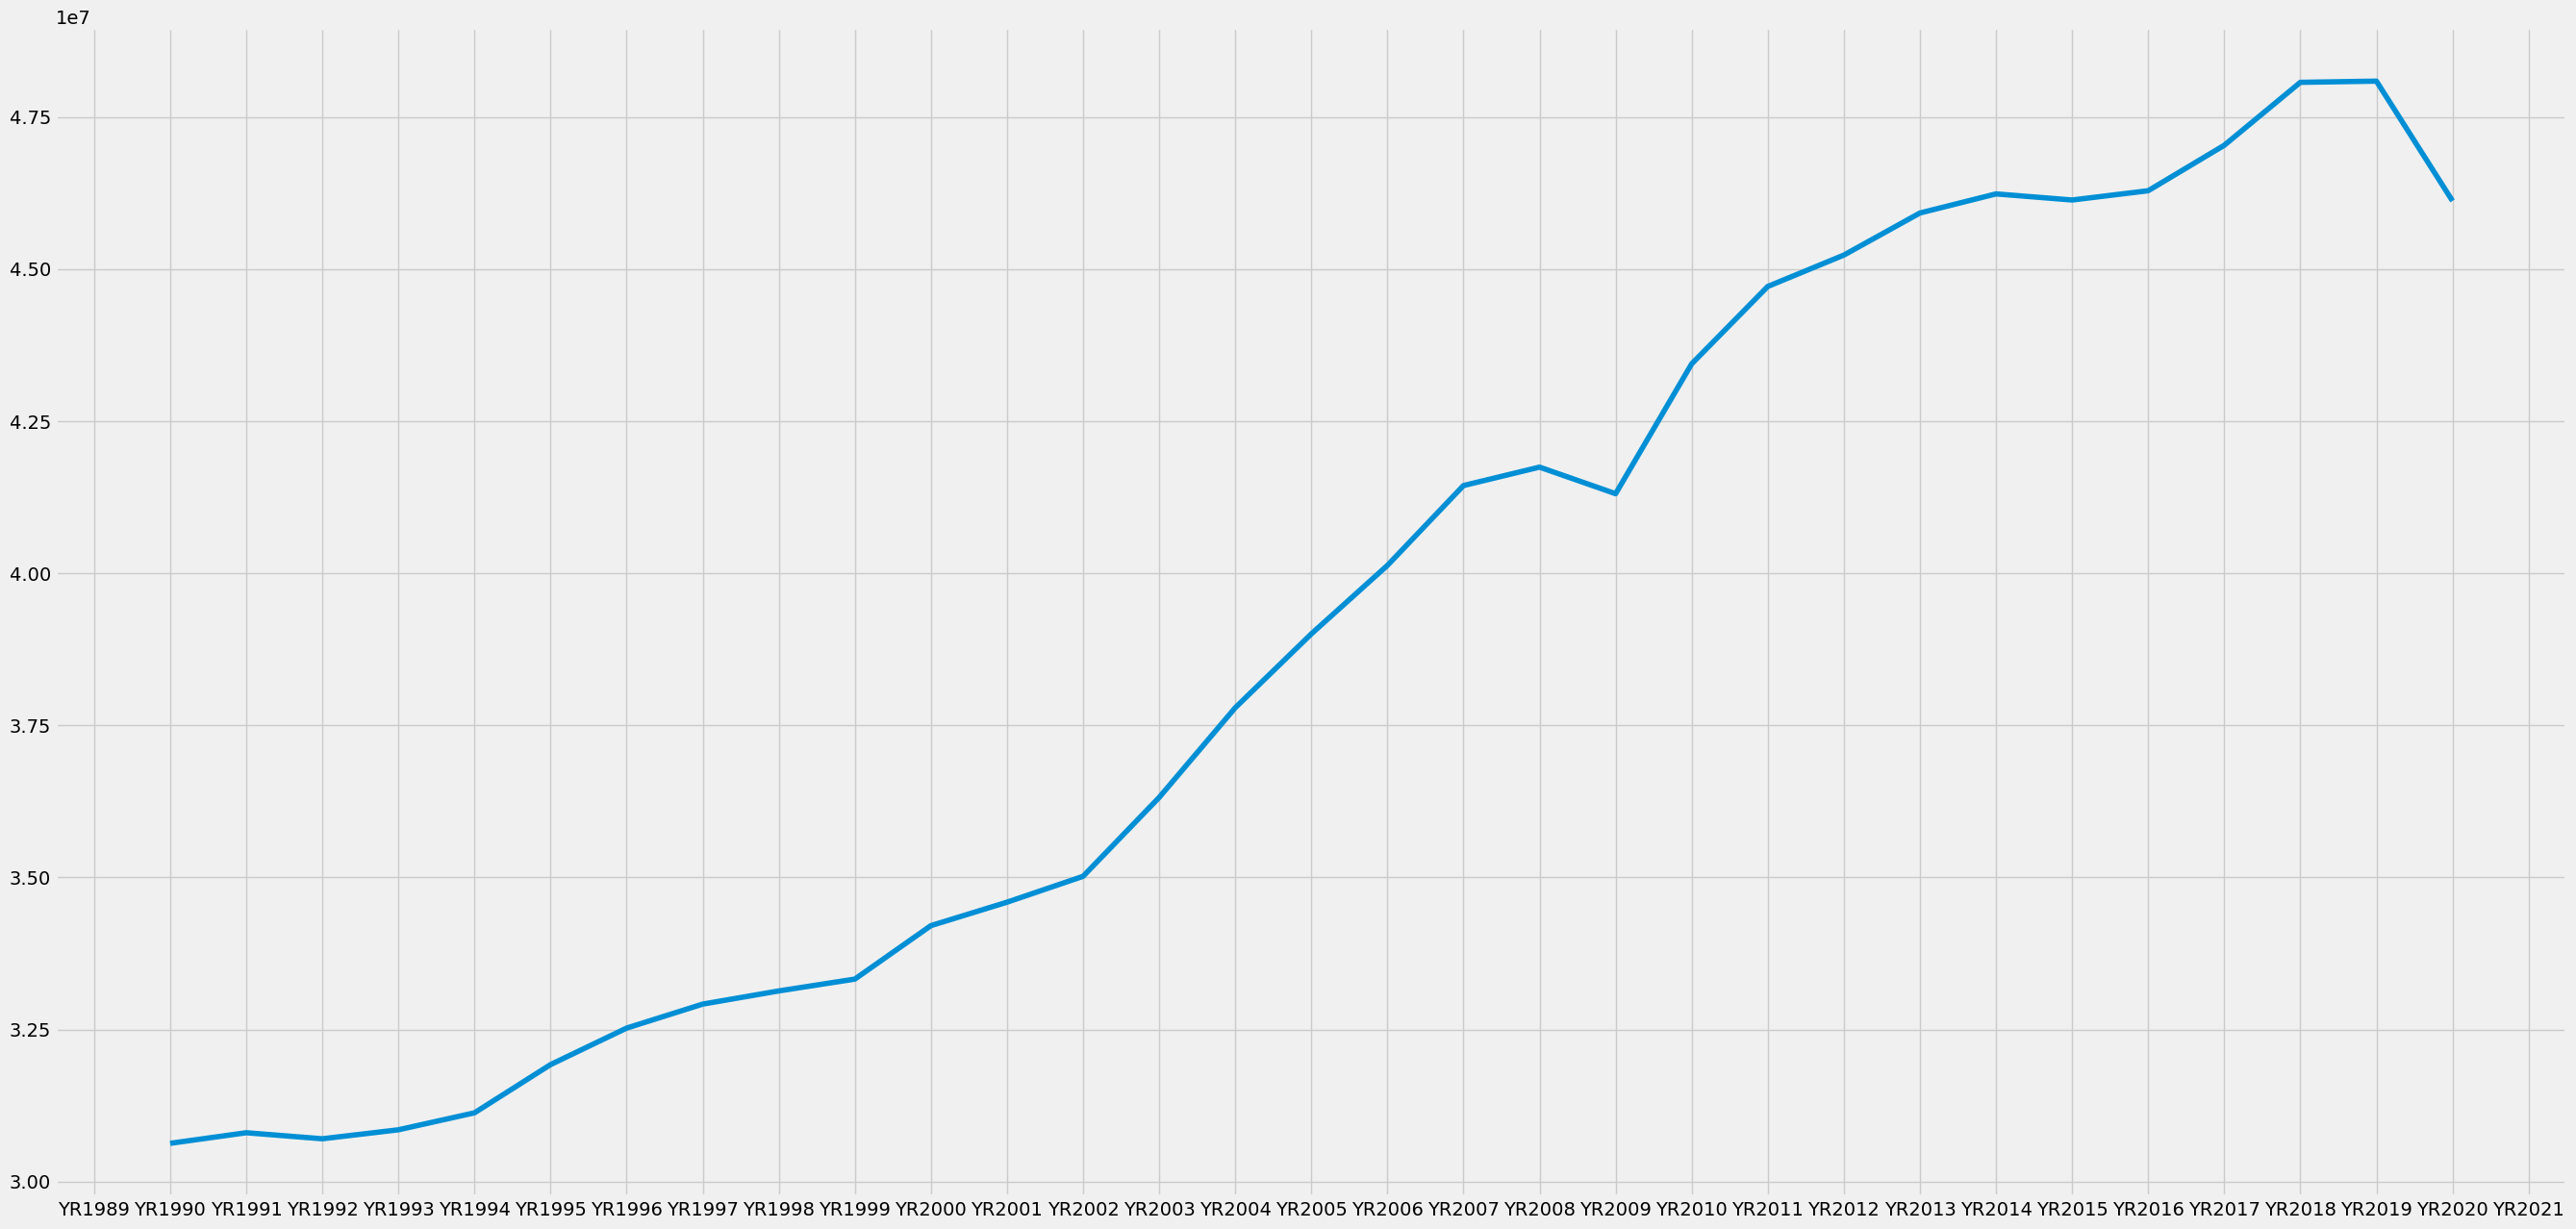

In [24]:
# plot the data using plotlib

plt.figure(figsize=(30,15), dpi=100)
plt.plot(df_ghg_wld)

# 02. Subsetting, wrangling, cleaning time series data

In [25]:
# Reset index

df_ghg_wld_2 = df_ghg_wld.reset_index()

In [26]:
df_ghg_wld_2.head()

economy,index,WLD
0,YR1960,NaN
1,YR1961,NaN
2,YR1962,NaN
3,YR1963,NaN
4,YR1964,NaN


In [27]:
# create a subset that contains GHG data from 1990 to 2020

data_sub = df_ghg_wld_2.loc[(df_ghg_wld_2['index'] >= 'YR1990') & (df_ghg_wld_2['index'] < 'YR2021')]

In [28]:
data_sub.head()

economy,index,WLD
30,YR1990,30629970.88
31,YR1991,30804062.57
32,YR1992,30704762.56
33,YR1993,30852305.35
34,YR1994,31131196.23


In [29]:
data_sub.dtypes

economy
index    object
WLD      object
dtype: object

In [30]:
# separate the index column into two columns to create a separate column for year

data_sub['index'].str.split('R',expand=True)

,0,1
30,Y,1990
31,Y,1991
32,Y,1992
33,Y,1993
34,Y,1994
35,Y,1995
36,Y,1996
37,Y,1997
38,Y,1998
39,Y,1999


In [31]:
# add the two new columns to the data subset

data_sub[['Y', 'year']] = data_sub['index'].str.split('R',expand=True)

In [33]:
# two new columns were added - Y and year

data_sub.head()

economy,index,WLD,Y,year
30,YR1990,30629970.88,Y,1990
31,YR1991,30804062.57,Y,1991
32,YR1992,30704762.56,Y,1992
33,YR1993,30852305.35,Y,1993
34,YR1994,31131196.23,Y,1994


In [34]:
# drop the 'Y' column

data_sub = data_sub.drop('Y', axis=1)

In [35]:
data_sub.head()

economy,index,WLD,year
30,YR1990,30629970.88,1990
31,YR1991,30804062.57,1991
32,YR1992,30704762.56,1992
33,YR1993,30852305.35,1993
34,YR1994,31131196.23,1994


In [37]:
# Set the "year" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['year']) # Create a datetime column from 'year'
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['year'], axis=1, inplace=True) # Drop the year column.
data_sub.head()

economy,index,WLD
datetime,,
1990-01-01,YR1990,30629970.88
1991-01-01,YR1991,30804062.57
1992-01-01,YR1992,30704762.56
1993-01-01,YR1993,30852305.35
1994-01-01,YR1994,31131196.23


In [38]:
# drop the 'index' column

data_sub.drop(['index'], axis=1, inplace=True) # Drop the year column.

In [39]:
data_sub.head()

economy,WLD
datetime,
1990-01-01,30629970.88
1991-01-01,30804062.57
1992-01-01,30704762.56
1993-01-01,30852305.35
1994-01-01,31131196.23


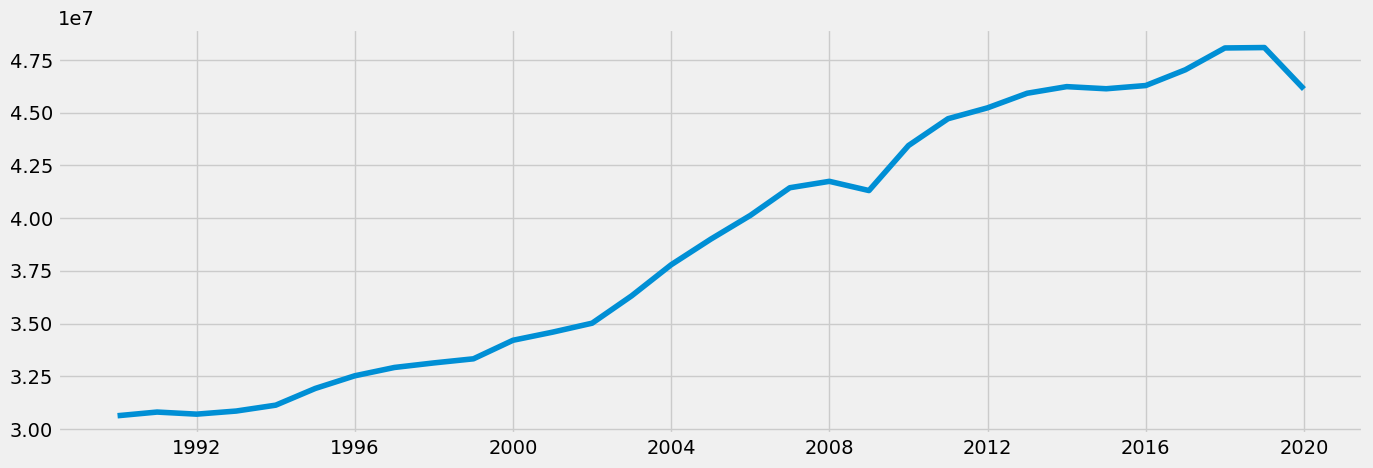

In [40]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [41]:
# Check for missing values

data_sub.isnull().sum() 

economy
WLD    0
dtype: int64

In [42]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

0

No missing values or duplicates detected

# 03. Time series analysis - decomposition

In [43]:
# decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data_sub, model='additive')

In [44]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

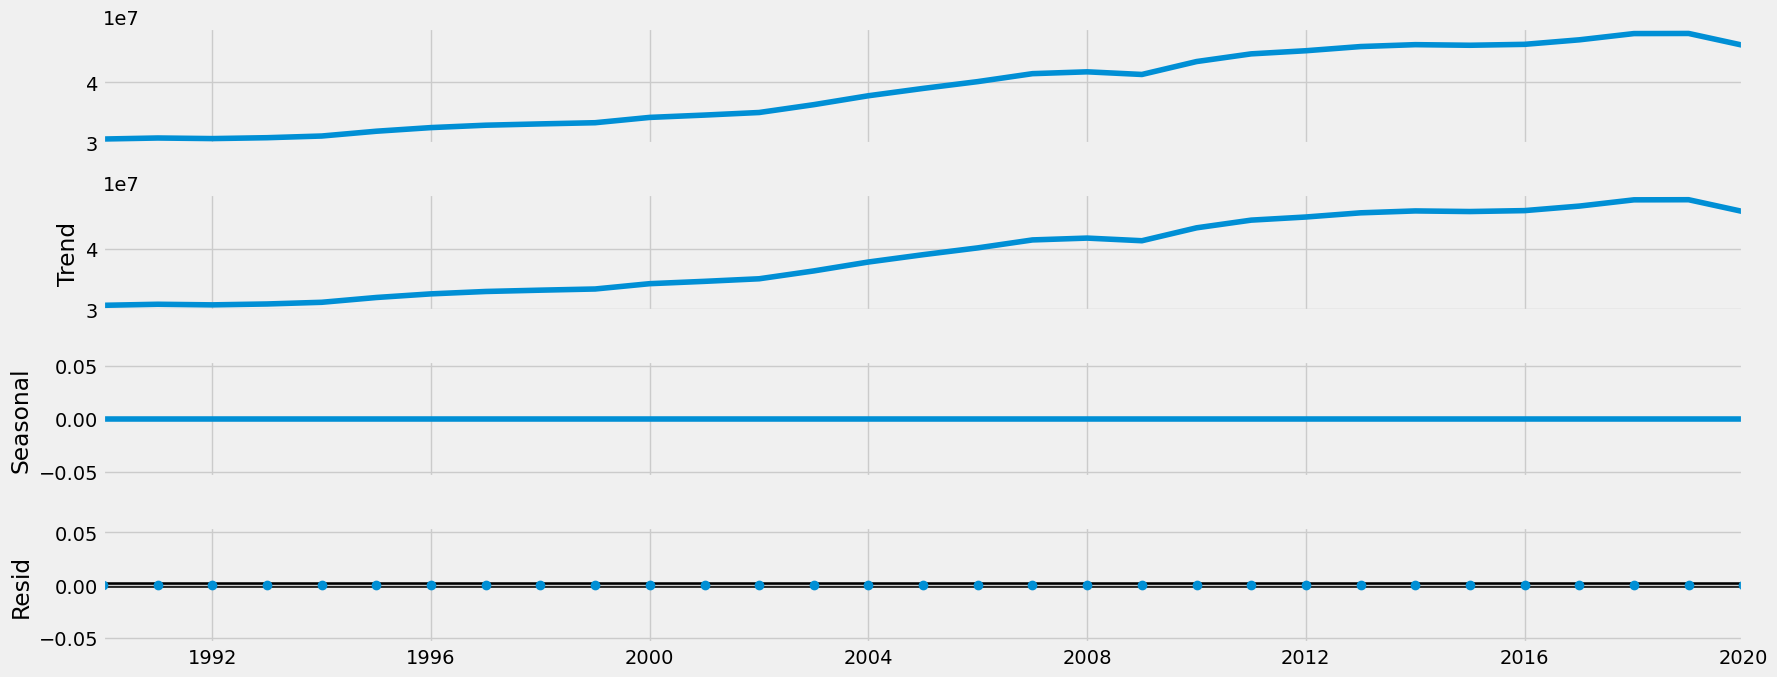

In [45]:
# Plot the separate components

decomposition.plot()
plt.show()

Overall, the trend for global greenhouse gas emissions has increased since 1990 with a dip in 2009. Emissions started to decline again in 2019. 
There is very little seasonality or residual data. This is probably because there is a clear increasing trend over time that does not seem to be influenced by seasones or other external factors. The dip from 2019 to 2020 can most likely be explained by the COVID-19. 

# 04. Test for stationarity

In [47]:
# initial test for stationarity

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub['WLD'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.666428
p-value                         0.855255
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


p-value is larger than 0.05
Test statistics are larger than the critical values at 5% and 10% significance levels

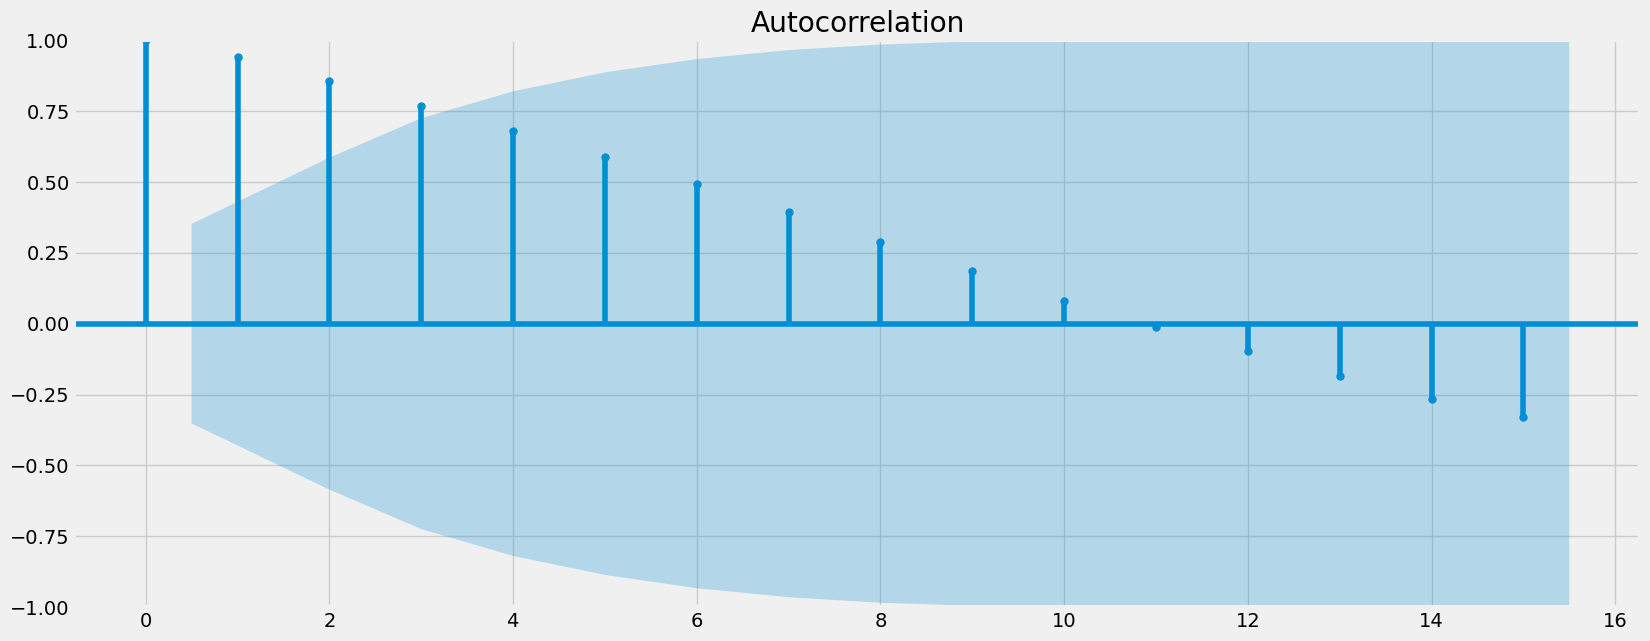

In [48]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_sub)
plt.show()

# 05. Stationarizing WB GHG data

In [49]:
# differencing : t - (t -1)

data_diff = data_sub - data_sub.shift(1)

In [50]:
# remove missing values as a result of the differencing

data_diff.dropna(inplace = True)

In [51]:
data_diff.head()

economy,WLD
datetime,
1991-01-01,174091.69
1992-01-01,-99300.01
1993-01-01,147542.79
1994-01-01,278890.88
1995-01-01,792520.91


In [52]:
data_diff.columns

Index(['WLD'], dtype='object', name='economy')

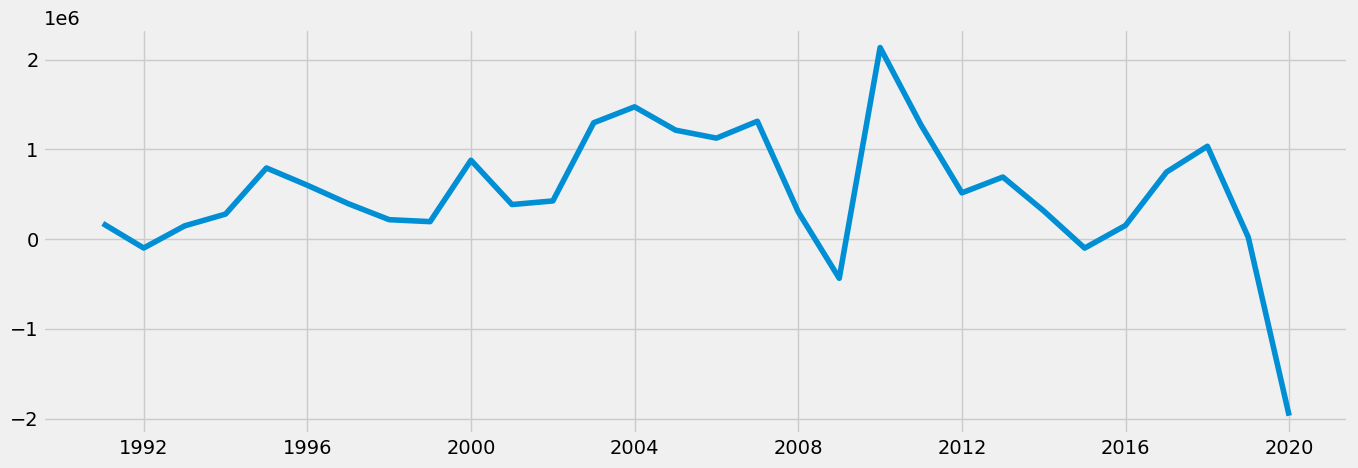

In [53]:
# Plot to see what differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [54]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.522112
p-value                         0.110187
Number of Lags Used             0.000000
Number of Observations Used    29.000000
Critical Value (1%)            -3.679060
Critical Value (5%)            -2.967882
Critical Value (10%)           -2.623158
dtype: float64


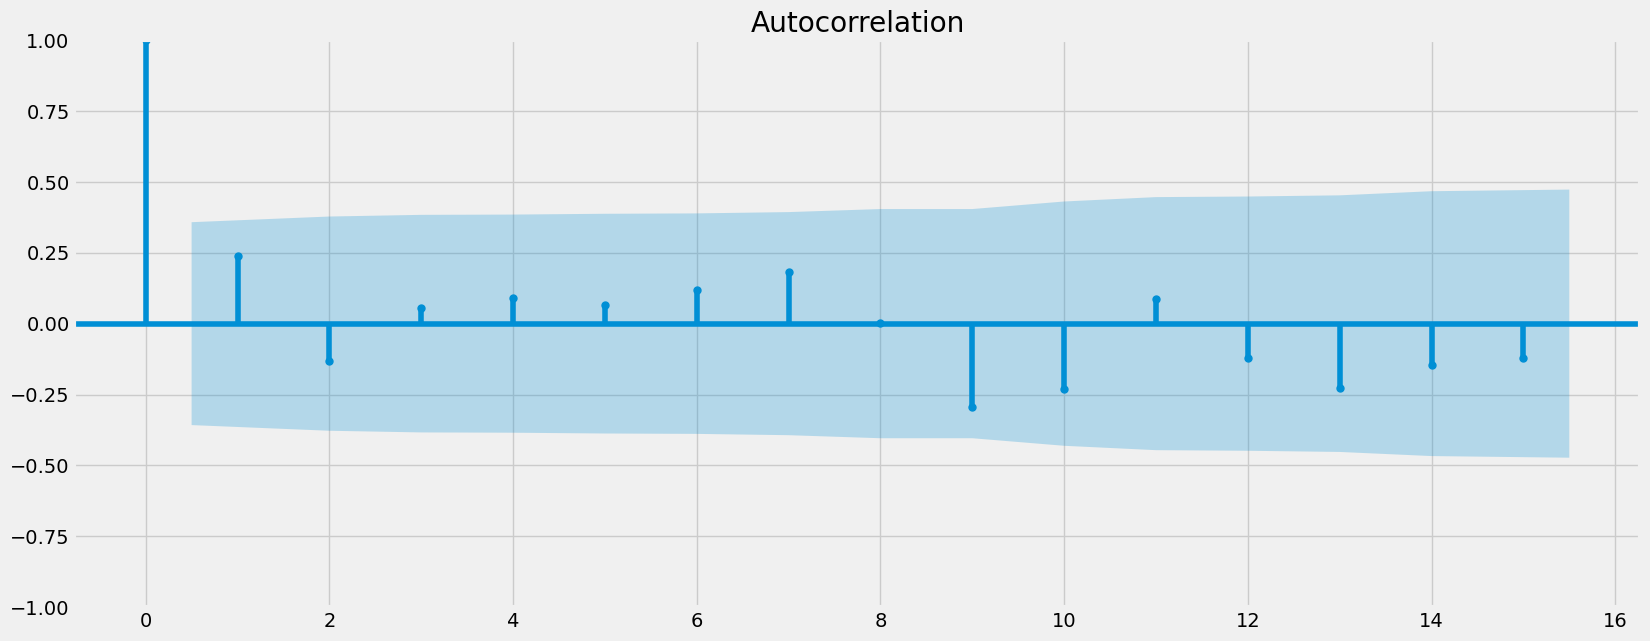

In [55]:
plot_acf(data_diff)
plt.show()

p-value is less than 0.05
Test statistic is still greater than the critical values at 5% and 10% siginificance levels
Conduct another round of differencing

In [56]:
# round 2 of data differencing

data_diff2 = data_diff - data_diff.shift(1)

In [57]:
# remove missing values as a result of the differencing

data_diff2.dropna(inplace = True)

In [58]:
data_diff2.head()

economy,WLD
datetime,
1992-01-01,-273391.7
1993-01-01,246842.8
1994-01-01,131348.09
1995-01-01,513630.03
1996-01-01,-192263.53


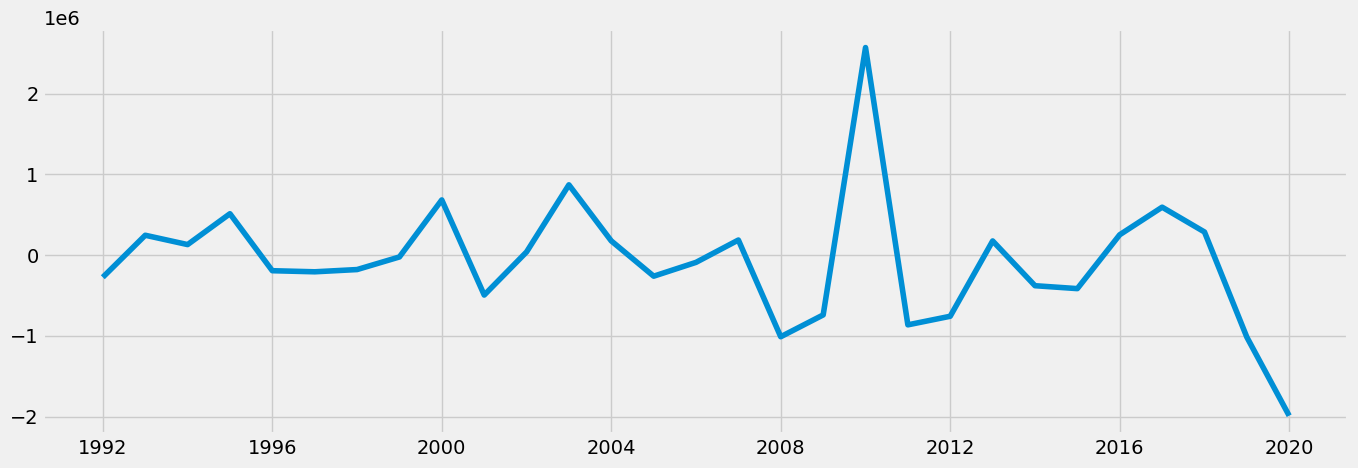

In [59]:
# Plot to see what differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [60]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                 -5.141543
p-value                         0.000012
Number of Lags Used             1.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64


p-value is very small, less than 0.05.
Test statistic is now less than the critical values at 5% and 10% significance levels.
This means we can reject the null hypothesis and, as a result, consider the series stationary.

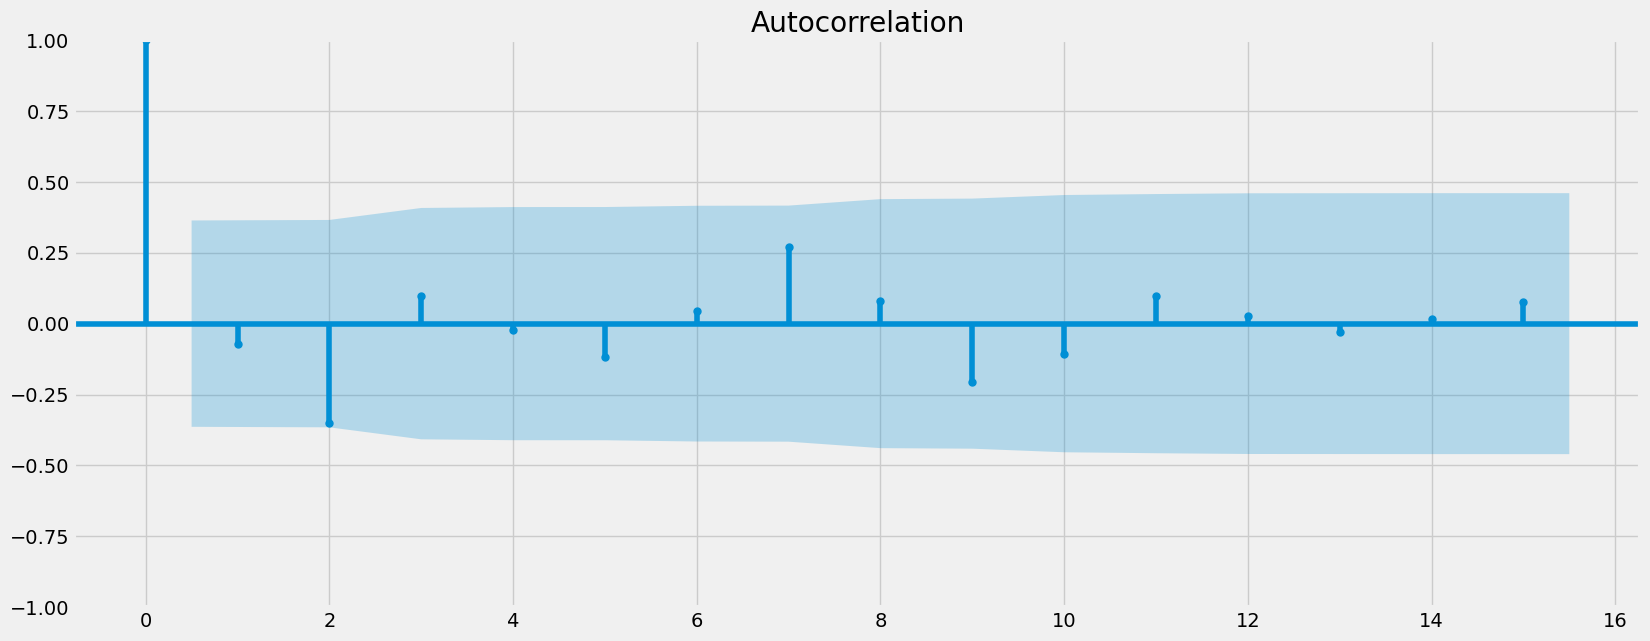

In [61]:
plot_acf(data_diff2)
plt.show()